# Pipeline

In [3]:
%pip install transformers datasets torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

CUDA available: True
GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
from transformers import pipeline

classifier = pipeline("image-classification", model="google/vit-base-patch16-224", device=0)  # device=0 → use GPU

result = classifier("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cats.png")
print(result)


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0


[{'label': 'tabby, tabby cat', 'score': 0.27686816453933716}, {'label': 'tiger cat', 'score': 0.2763681411743164}, {'label': 'Egyptian cat', 'score': 0.1402820646762848}, {'label': 'hay', 'score': 0.02531461976468563}, {'label': 'wool, woolen, woollen', 'score': 0.01993267424404621}]


# Manual Inferences 

In [4]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests

In [5]:
model_id = "google/vit-base-patch16-224"

processor = AutoImageProcessor.from_pretrained(model_id)
model = AutoModelForImageClassification.from_pretrained(model_id).to("cuda")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_16x9.jpg?w=1200"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

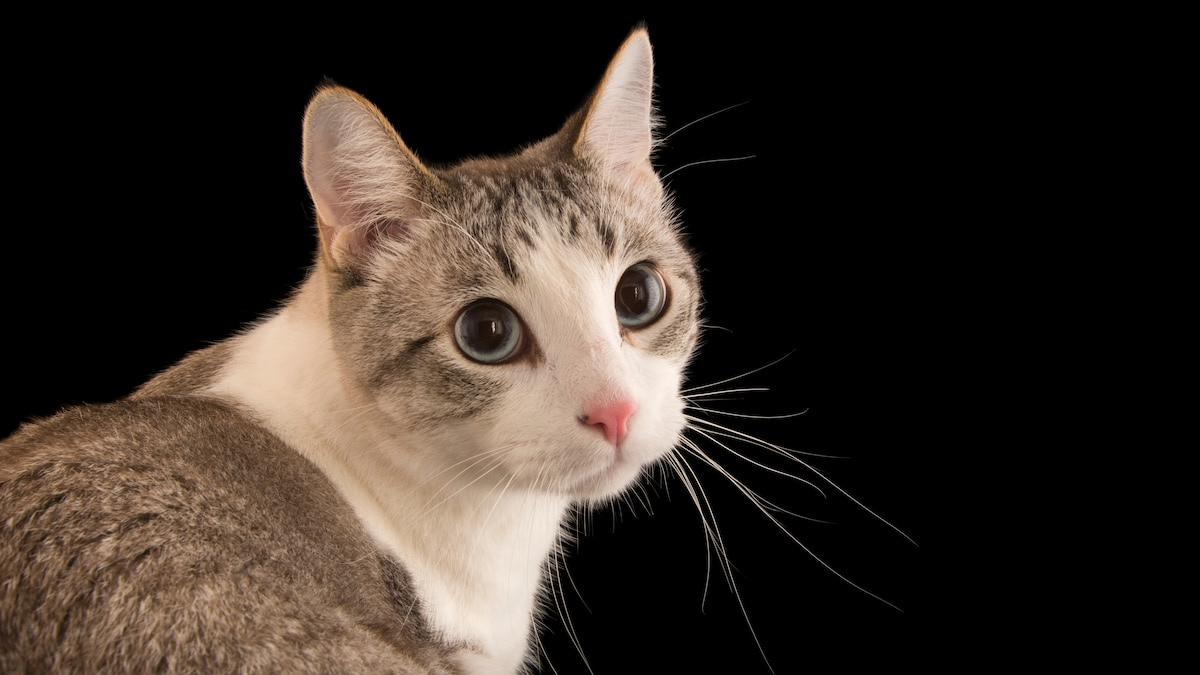

In [7]:
image

In [8]:
inputs = processor(images=image, return_tensors="pt").to("cuda")
inputs

{'pixel_values': tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.4039, -0.3961, -0.4196,  ..., -1.0000, -1.0000, -1.0000],
          [-0.4667, -0.4431, -0.4275,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5216, -0.4196, -0.3098,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.5529, -0.5608, -0.5686,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6078, -0.5922, -0.5765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.5608, -0.4667,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1

In [9]:
with torch.no_grad():
    outputs = model(**inputs)

In [10]:
outputs

ImageClassifierOutput(loss=None, logits=tensor([[-5.8936e-01,  1.3551e-02, -7.4256e-01, -2.9125e-01, -6.2229e-01,
         -1.4571e+00, -1.5759e+00,  4.4979e-01,  3.4261e-01, -6.6023e-01,
         -8.1543e-01, -8.3265e-01, -1.6904e-01, -1.2705e+00, -9.5268e-01,
          3.1856e-02, -9.8533e-01, -4.2889e-01,  2.1976e-01, -1.1330e+00,
         -3.9153e-01, -4.8031e-01, -3.4554e-01, -3.4799e-01, -1.0019e+00,
         -5.0086e-01, -3.3807e-01, -7.2921e-01, -8.5859e-01, -2.3075e-01,
         -8.0079e-01, -7.6267e-01, -9.6103e-01, -2.2797e+00, -1.1315e+00,
         -1.1150e+00,  1.2469e-01, -1.1570e-01,  1.6933e-01, -3.6855e-01,
         -3.0083e-01, -1.0832e-03,  2.6086e-01, -2.1914e-01, -1.8729e-01,
         -8.3338e-01, -8.0807e-01, -8.0744e-01, -8.2895e-01, -1.9515e+00,
         -1.8202e+00, -5.6209e-01, -1.9818e-01, -1.1327e+00, -5.9711e-01,
         -1.1794e+00, -2.1958e-01, -5.9645e-01, -9.9585e-01, -3.5076e-01,
          5.3799e-01,  1.7410e-01, -5.1369e-01,  1.2357e-01, -7.2165e-01

In [11]:
logits = outputs.logits
logits

tensor([[-5.8936e-01,  1.3551e-02, -7.4256e-01, -2.9125e-01, -6.2229e-01,
         -1.4571e+00, -1.5759e+00,  4.4979e-01,  3.4261e-01, -6.6023e-01,
         -8.1543e-01, -8.3265e-01, -1.6904e-01, -1.2705e+00, -9.5268e-01,
          3.1856e-02, -9.8533e-01, -4.2889e-01,  2.1976e-01, -1.1330e+00,
         -3.9153e-01, -4.8031e-01, -3.4554e-01, -3.4799e-01, -1.0019e+00,
         -5.0086e-01, -3.3807e-01, -7.2921e-01, -8.5859e-01, -2.3075e-01,
         -8.0079e-01, -7.6267e-01, -9.6103e-01, -2.2797e+00, -1.1315e+00,
         -1.1150e+00,  1.2469e-01, -1.1570e-01,  1.6933e-01, -3.6855e-01,
         -3.0083e-01, -1.0832e-03,  2.6086e-01, -2.1914e-01, -1.8729e-01,
         -8.3338e-01, -8.0807e-01, -8.0744e-01, -8.2895e-01, -1.9515e+00,
         -1.8202e+00, -5.6209e-01, -1.9818e-01, -1.1327e+00, -5.9711e-01,
         -1.1794e+00, -2.1958e-01, -5.9645e-01, -9.9585e-01, -3.5076e-01,
          5.3799e-01,  1.7410e-01, -5.1369e-01,  1.2357e-01, -7.2165e-01,
         -8.0049e-01,  5.1313e-01, -1.

In [12]:
predicted_class = logits.argmax(-1).item()
predicted_class

285

In [13]:
print("Predicted class:", model.config.id2label[predicted_class])

Predicted class: Egyptian cat


# Training Mode

In [3]:
%pip install accelerate>=0.26.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install evaluate

Note: you may need to restart the kernel to use updated packages.


In [7]:
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer
import numpy as np
import evaluate
import torch
from datasets import load_dataset

In [8]:
# Dataset
dataset = load_dataset("cifar10")

In [9]:
# Processor & model
model_id = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_id)
model = AutoModelForImageClassification.from_pretrained(
    model_id,
    num_labels=10,
    ignore_mismatched_sizes=True,
).to("cuda")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
# Tiny subset (200 train, 50 test) for quick test
small_train = dataset["train"].shuffle(seed=42).select(range(200))
small_test = dataset["test"].shuffle(seed=42).select(range(50))

def preprocess(batch):
    return processor(images=batch["img"], return_tensors="pt")

small_test = small_test.map(preprocess, batched=True)
small_train = small_train.map(preprocess, batched=True)
print(small_train)

small_train = small_train.remove_columns(["img"])
small_test  = small_test.remove_columns(["img",])


Dataset({
    features: ['img', 'label', 'pixel_values'],
    num_rows: 200
})


In [11]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred.predictions, eval_pred.label_ids
    preds = np.argmax(logits, axis=1)
    # Must return a dict with "accuracy"
    return {"accuracy": metric.compute(predictions=preds, references=labels)["accuracy"]}


In [12]:
# Training setup
training_args = TrainingArguments(
    output_dir="./vit-cifar10",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=5,
    fp16=torch.cuda.is_available(),
    push_to_hub=False,
    report_to="none",
    
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train,
    eval_dataset=small_test,
    compute_metrics=compute_metrics,
)

In [13]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.521000,1.570000,0.560000
2,0.834200,1.318257,0.680000


TrainOutput(global_step=50, training_loss=1.3651303100585936, metrics={'train_runtime': 55.7666, 'train_samples_per_second': 7.173, 'train_steps_per_second': 0.897, 'total_flos': 3.09990183616512e+16, 'train_loss': 1.3651303100585936, 'epoch': 2.0})

In [14]:
id2label = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

label2id = {v: k for k, v in id2label.items()}



In [15]:
model.config.id2label = id2label
model.config.label2id = label2id

In [16]:
trainer.save_model("./vit-cifar10-model")  
processor.save_pretrained("./vit-cifar10-model")

['./vit-cifar10-model\\preprocessor_config.json']

In [17]:
from huggingface_hub import notebook_login
notebook_login()

In [18]:
name = './vit-cifar10-model'
model = AutoModelForImageClassification.from_pretrained(name)
processor = AutoImageProcessor.from_pretrained(name)

# Push to Hub (your username/repo_name)
repo_name = "Noobhacker69/Image_VIT_Manual_trainer_inferences"  # you choose the name
model.push_to_hub(repo_name)
processor.push_to_hub(repo_name)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/Noobhacker69/Image_VIT_Manual_trainer_inferences/commit/1a98f3307325a1f8d145fdc467c84caf6f623efc', commit_message='Upload processor', commit_description='', oid='1a98f3307325a1f8d145fdc467c84caf6f623efc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Noobhacker69/Image_VIT_Manual_trainer_inferences', endpoint='https://huggingface.co', repo_type='model', repo_id='Noobhacker69/Image_VIT_Manual_trainer_inferences'), pr_revision=None, pr_num=None)